## Amazon Delivery Time Prediction Using Machine Learning

In [1]:
#importing necessary libraries

import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder


In [2]:
# Load dataset

df = pd.read_csv('amazon_delivery.csv')

In [3]:
df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


In [4]:
# Dataset info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


## Data Pre-processing

In [5]:
#Handling missing values

df.isnull().sum()

Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64

In [6]:
df.describe()

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Delivery_Time
count,43739.000000,43685.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000
mean,29.567137,4.633780,17.210960,70.661177,17.459031,70.821842,124.905645
std,5.815155,0.334716,7.764225,21.475005,7.342950,21.153148,51.915451
min,15.000000,1.000000,-30.902872,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.500000,12.933298,73.170283,12.985996,73.280000,90.000000
50%,30.000000,4.700000,18.551440,75.898497,18.633626,76.002574,125.000000
75%,35.000000,4.900000,22.732225,78.045359,22.785049,78.104095,160.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,270.000000


In [7]:
df.columns

Index(['Order_ID', 'Agent_Age', 'Agent_Rating', 'Store_Latitude',
       'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Order_Date',
       'Order_Time', 'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area',
       'Delivery_Time', 'Category'],
      dtype='object')

In [8]:
df.dropna(subset=['Agent_Age', 'Agent_Rating', 'Store_Latitude',
       'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Order_Date',
       'Order_Time', 'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area',
       'Delivery_Time', 'Category'], inplace=True)

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 43594 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43594 non-null  object 
 1   Agent_Age        43594 non-null  int64  
 2   Agent_Rating     43594 non-null  float64
 3   Store_Latitude   43594 non-null  float64
 4   Store_Longitude  43594 non-null  float64
 5   Drop_Latitude    43594 non-null  float64
 6   Drop_Longitude   43594 non-null  float64
 7   Order_Date       43594 non-null  object 
 8   Order_Time       43594 non-null  object 
 9   Pickup_Time      43594 non-null  object 
 10  Weather          43594 non-null  object 
 11  Traffic          43594 non-null  object 
 12  Vehicle          43594 non-null  object 
 13  Area             43594 non-null  object 
 14  Delivery_Time    43594 non-null  int64  
 15  Category         43594 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.7+ MB


In [10]:
# Drop Duplicates

df = df.drop_duplicates()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43594 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43594 non-null  object 
 1   Agent_Age        43594 non-null  int64  
 2   Agent_Rating     43594 non-null  float64
 3   Store_Latitude   43594 non-null  float64
 4   Store_Longitude  43594 non-null  float64
 5   Drop_Latitude    43594 non-null  float64
 6   Drop_Longitude   43594 non-null  float64
 7   Order_Date       43594 non-null  object 
 8   Order_Time       43594 non-null  object 
 9   Pickup_Time      43594 non-null  object 
 10  Weather          43594 non-null  object 
 11  Traffic          43594 non-null  object 
 12  Vehicle          43594 non-null  object 
 13  Area             43594 non-null  object 
 14  Delivery_Time    43594 non-null  int64  
 15  Category         43594 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.7+ MB


In [12]:
df = df.drop(['Order_ID','Order_Date'], axis =1)

In [13]:
cor = df.corr(numeric_only=True)
cor


,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Delivery_Time
Agent_Age,1.000000,-0.117577,0.002018,0.000761,0.002939,0.000758,0.258463
Agent_Rating,-0.117577,1.000000,-0.012068,-0.013486,-0.013513,-0.013674,-0.307725
Store_Latitude,0.002018,-0.012068,1.000000,0.650670,0.936702,0.650723,0.016890
Store_Longitude,0.000761,-0.013486,0.650670,1.000000,0.690415,0.999998,0.011805
Drop_Latitude,0.002939,-0.013513,0.936702,0.690415,1.000000,0.690477,0.017279
Drop_Longitude,0.000758,-0.013674,0.650723,0.999998,0.690477,1.000000,0.012287
Delivery_Time,0.258463,-0.307725,0.016890,0.011805,0.017279,0.012287,1.000000


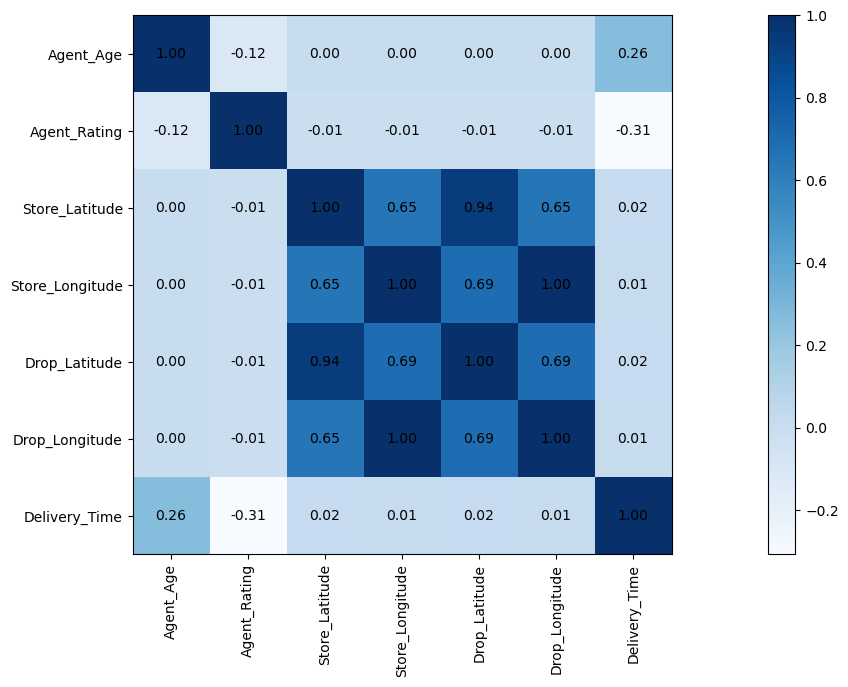

In [14]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(25, 7))
plt.imshow(corr, cmap='Blues')
plt.colorbar()

# Adding x and y ticks for better readability
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

# Adding the correlation values inside the matrix
for i in range(len(corr)):
    for j in range(len(corr)):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}", ha='center', va='center', color='black')

plt.show()

### Exploratory Data Analysis



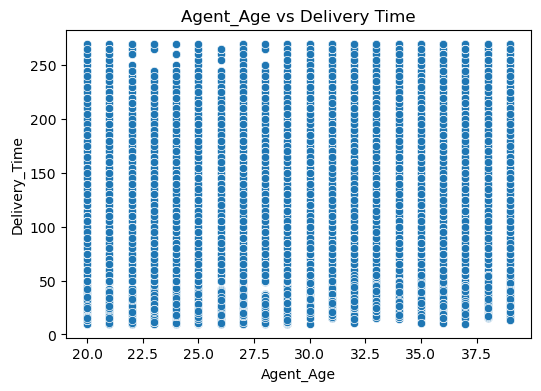

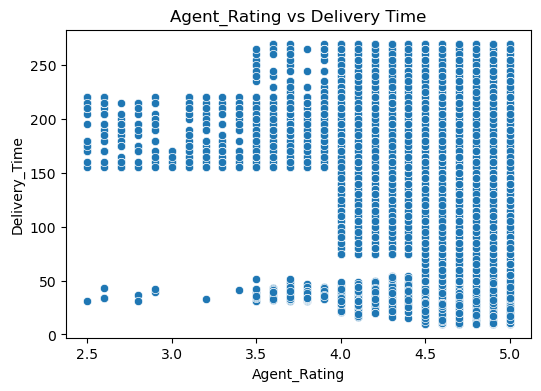

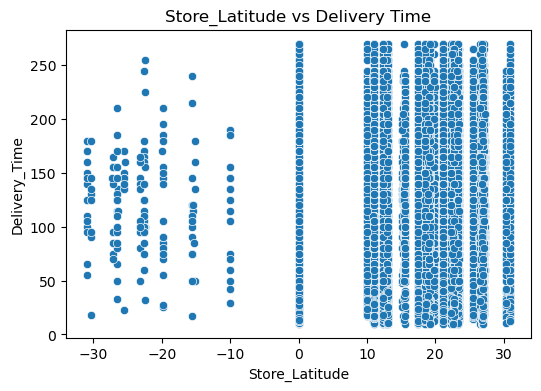

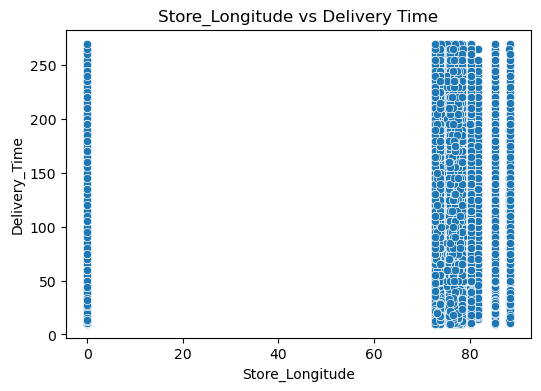

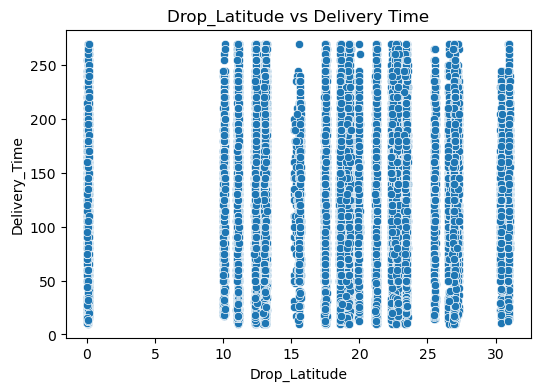

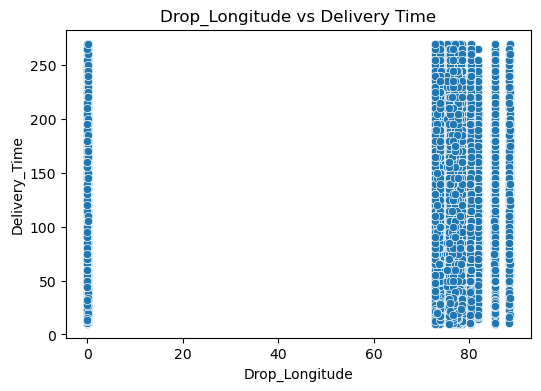

In [15]:
##Feature vs. Delivery Time

# Select numerical features
num_features = ['Agent_Age', 'Agent_Rating', 'Store_Latitude', 'Store_Longitude', 
                'Drop_Latitude', 'Drop_Longitude']  

# Plot scatter plots
for feature in num_features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[feature], y=df['Delivery_Time'])
    plt.title(f'{feature} vs Delivery Time')
    plt.show()


#### Handling Outliers

In [16]:
## Creating a list of features (excluding the last column)

features = list(df)[:-1]
features

['Agent_Age',
 'Agent_Rating',
 'Store_Latitude',
 'Store_Longitude',
 'Drop_Latitude',
 'Drop_Longitude',
 'Order_Time',
 'Pickup_Time',
 'Weather',
 'Traffic',
 'Vehicle',
 'Area',
 'Delivery_Time']

In [17]:
numerical_features = ['Agent_Age', 'Agent_Rating', 'Store_Latitude', 'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Delivery_Time']

In [18]:
features = list(numerical_features)
features

['Agent_Age',
 'Agent_Rating',
 'Store_Latitude',
 'Store_Longitude',
 'Drop_Latitude',
 'Drop_Longitude',
 'Delivery_Time']

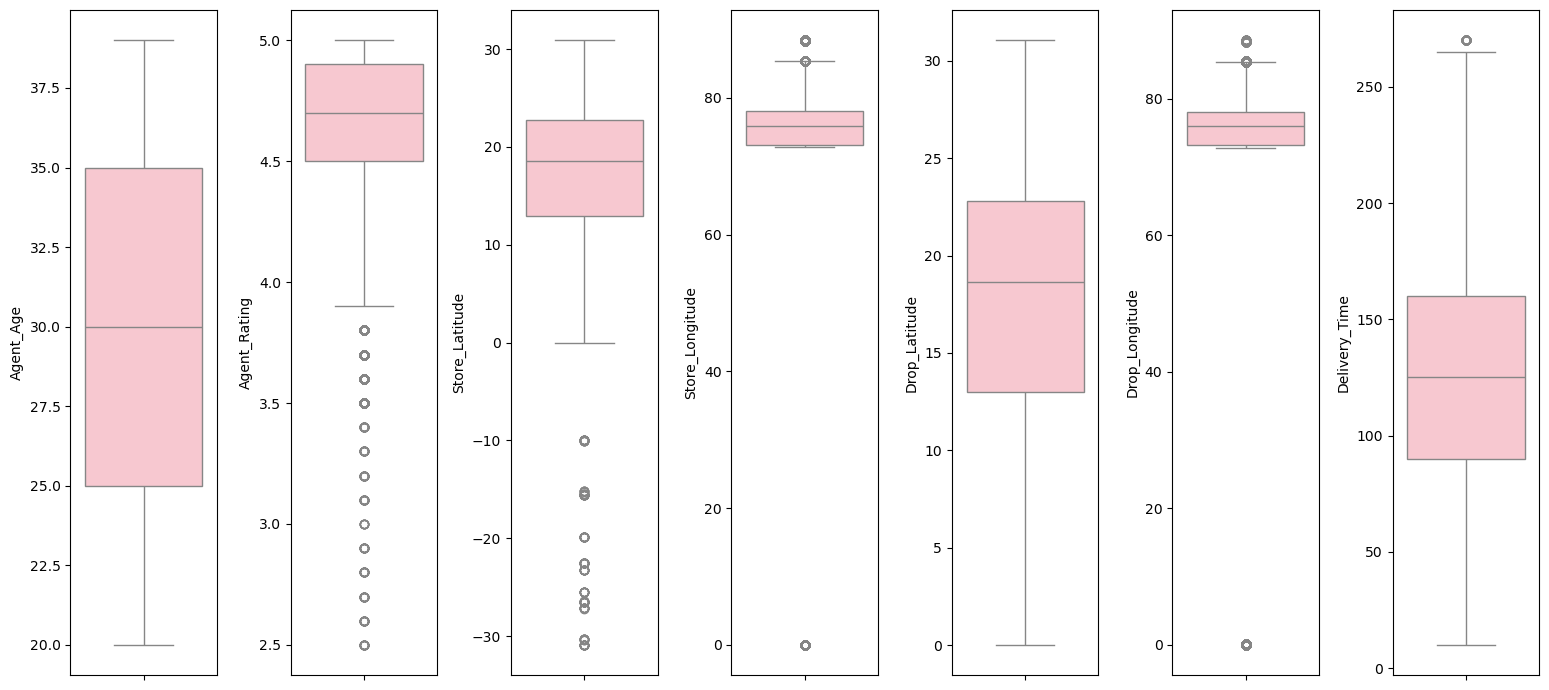

In [19]:
plt.figure(figsize=(20, 7))
for i in range(0, len(features)):
    plt.subplot(1, 9, i+1)
    sns.boxplot(y=features[i],data=df,color='pink')
    plt.tight_layout()


    

Six features have outliers and need to removed based IQR(Interquartile Range) upper and lower limit.

In [20]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# List the features you want to check for outliers
features_with_outliers = ['Agent_Rating', 'Store_Latitude', 'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Delivery_Time']

# Remove outliers for each feature
for feature in features_with_outliers:
    df = remove_outliers_iqr(df, feature)    

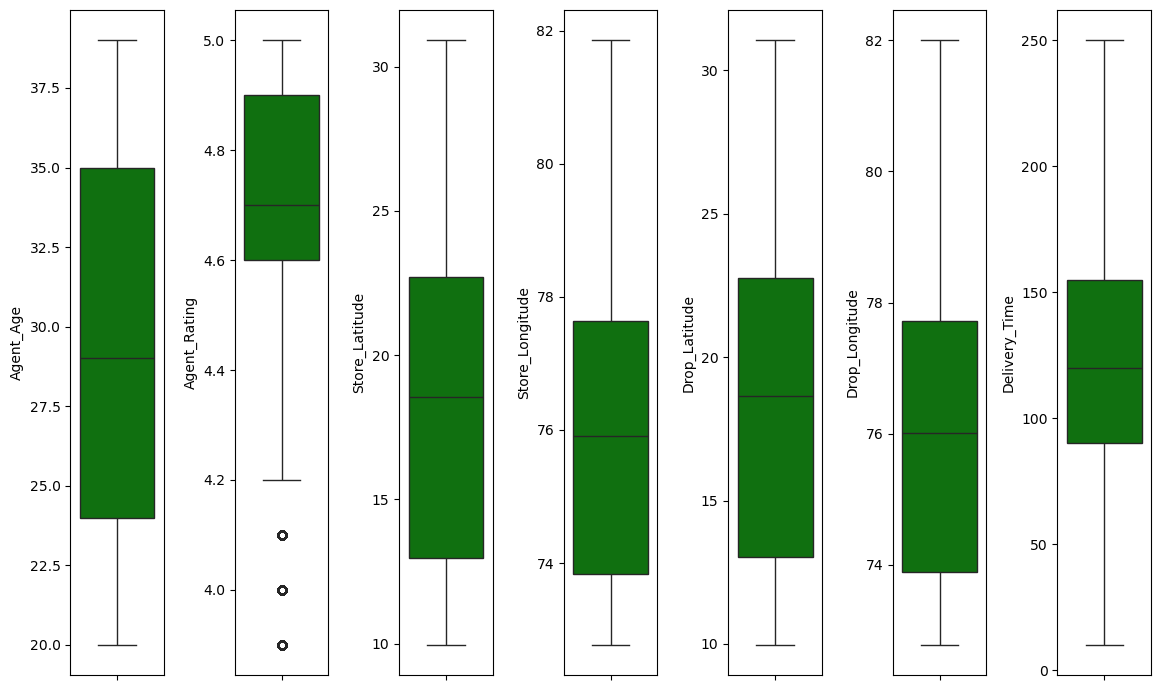

In [21]:
plt.figure(figsize=(15, 7))
for i in range(0, len(features)):
    plt.subplot(1, 9, i+1)
    sns.boxplot(y=features[i],data=df,color='green')
    plt.tight_layout()

### Data Visualization

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35654 entries, 0 to 43737
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Agent_Age        35654 non-null  int64  
 1   Agent_Rating     35654 non-null  float64
 2   Store_Latitude   35654 non-null  float64
 3   Store_Longitude  35654 non-null  float64
 4   Drop_Latitude    35654 non-null  float64
 5   Drop_Longitude   35654 non-null  float64
 6   Order_Time       35654 non-null  object 
 7   Pickup_Time      35654 non-null  object 
 8   Weather          35654 non-null  object 
 9   Traffic          35654 non-null  object 
 10  Vehicle          35654 non-null  object 
 11  Area             35654 non-null  object 
 12  Delivery_Time    35654 non-null  int64  
 13  Category         35654 non-null  object 
dtypes: float64(5), int64(2), object(7)
memory usage: 4.1+ MB


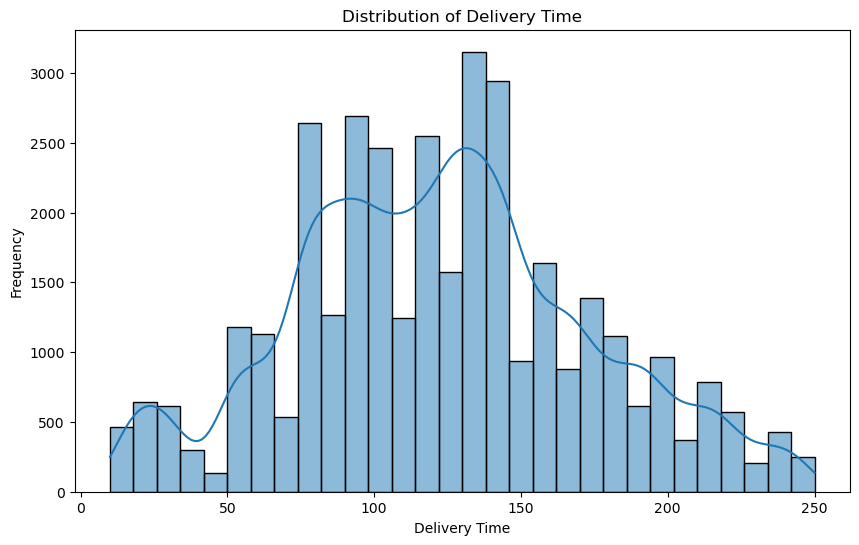

In [23]:
# Distribution of Delivery Time
plt.figure(figsize=(10, 6))
sns.histplot(df['Delivery_Time'], bins=30, kde=True)
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time')
plt.ylabel('Frequency')
plt.show()

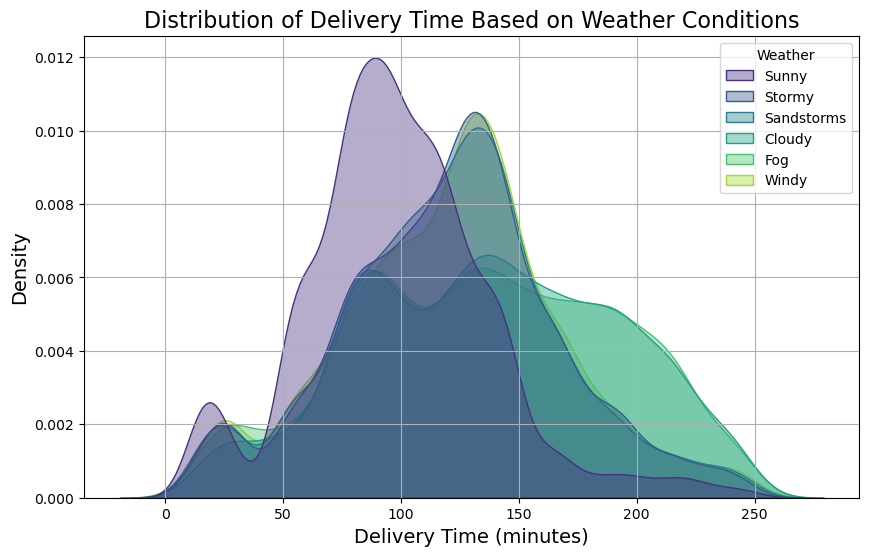

In [24]:
# Distribution of Delivery time based on Weather Conditions
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='Delivery_Time', hue='Weather', fill=True, common_norm=False, alpha=0.4, palette='viridis')
plt.title('Distribution of Delivery Time Based on Weather Conditions', fontsize=16)
plt.xlabel('Delivery Time (minutes)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True)
plt.show()


* Sunny weather results in the shortest and most consistent delivery times.

* Stormy conditions cause more variability and longer delivery times.

* Cloudy weather also introduces variability and moderately longer delivery times.

* Windy conditions lead to increased variability in delivery times.

* Sandstorms result in notably delayed deliveries, with a wide range of times.

C:\Users\user\AppData\Local\Temp\ipykernel_5428\7386033.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Weather', data=df, palette='pastel')


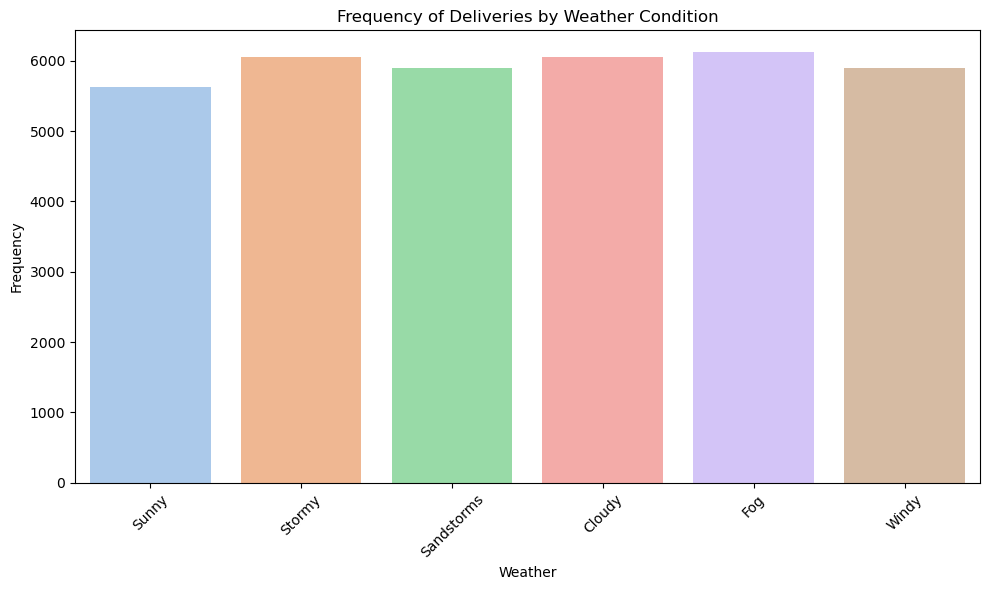

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Weather', data=df, palette='pastel')
plt.xlabel('Weather')
plt.ylabel('Frequency')
plt.title('Frequency of Deliveries by Weather Condition')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_5428\3144595088.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Agent_Rating', y='Delivery_Time', data=df, palette='pastel')


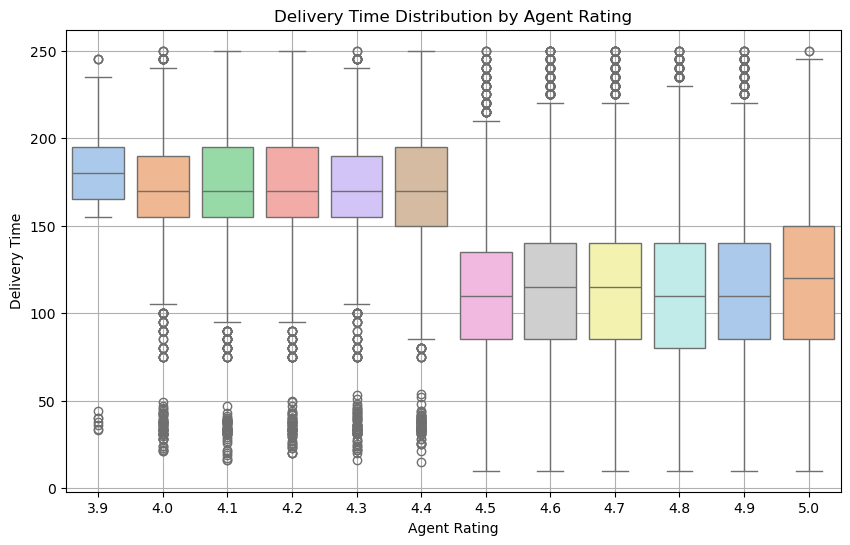

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Agent_Rating', y='Delivery_Time', data=df, palette='pastel')
plt.title('Delivery Time Distribution by Agent Rating')
plt.xlabel('Agent Rating')
plt.ylabel('Delivery Time')
plt.grid(True)
plt.show()


This plot highlights the importance of agent performance ratings in predicting delivery efficiency. By focusing on improving agent performance, the company can enhance delivery times and overall customer satisfaction.

In [27]:
numerical_features = df[['Agent_Age', 'Agent_Rating', 'Store_Latitude', 'Store_Longitude',
                         'Drop_Latitude', 'Drop_Longitude', 'Delivery_Time']]

C:\Users\user\AppData\Local\Temp\ipykernel_5428\101522689.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Traffic', y='Delivery_Time', data=df, palette='muted')


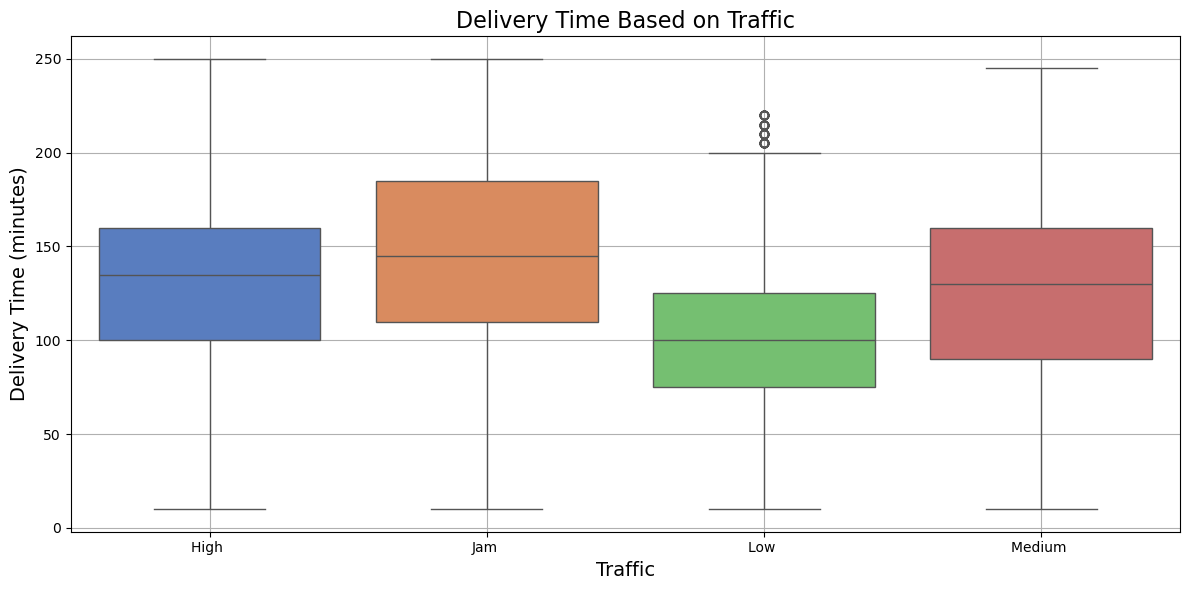

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Traffic', y='Delivery_Time', data=df, palette='muted')
plt.title('Delivery Time Based on Traffic', fontsize=16)
plt.xlabel('Traffic', fontsize=14)
plt.ylabel('Delivery Time (minutes)', fontsize=14)
plt.grid(True)
plt.tight_layout() 
plt.show()


* Higher Traffic: Results in longer and more variable delivery times.

* Traffic Jams: Significantly increase delivery times and reduce consistency.

* Medium Traffic: Shows slightly better delivery times compared to high traffic but still variable.

* Low Traffic: Delivers the shortest and most consistent delivery times.

#### Efficient route planning and real-time traffic updates can help mitigate these delays and improve delivery performance.



In [29]:
df['Delivery_Time'].describe()

count    35654.000000
mean       122.806193
std         50.320654
min         10.000000
25%         90.000000
50%        120.000000
75%        155.000000
max        250.000000
Name: Delivery_Time, dtype: float64

* The **mean** and **median** are relatively close to each other. This proximity suggests a relatively balanced distribution of delivery times with some variability but not significant skewness.

* The **standard deviation** of 50.32 minutes indicates the variability or dispersion of delivery times around the mean.

* The range of delivery times (240 minutes (**max-min**) highlights a substantial variability in performance.

* **25%** of deliveries take 90 minutes or less. This provides insight into the lower end of delivery times and suggests that a quarter of the deliveries are relatively quick.

* **75%** of deliveries take 155 minutes or less. This indicates that a significant portion of deliveries falls within this timeframe, providing insight into the upper range of typical delivery times.
  


In [30]:
df

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,37,4.9,22.745049,75.892471,22.765049,75.912471,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,34,4.5,12.913041,77.683237,13.043041,77.813237,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,23,4.4,12.914264,77.678400,12.924264,77.688400,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,38,4.7,11.003669,76.976494,11.053669,77.026494,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,32,4.6,12.972793,80.249982,13.012793,80.289982,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43731,30,4.2,26.469003,80.316344,26.539003,80.386344,18:10:00,18:25:00,Cloudy,Medium,motorcycle,Metropolitian,210,Apparel
43732,28,4.9,13.029198,77.570997,13.059198,77.600997,21:55:00,22:00:00,Sandstorms,Jam,scooter,Metropolitian,145,Toys
43734,30,4.8,26.902328,75.794257,26.912328,75.804257,11:35:00,11:45:00,Windy,High,motorcycle,Metropolitian,160,Home
43736,30,4.9,13.022394,80.242439,13.052394,80.272439,23:50:00,00:05:00,Cloudy,Low,scooter,Metropolitian,80,Home


* **Agent_Rating vs. Delivery_Time:** The weak negative correlation suggests that better agent ratings are mildly associated with faster delivery times.

* **Delivery_Time vs. Distance_km:** The weak positive correlation indicates that longer delivery times are somewhat associated with longer distances.

Higher agent ratings tend to result in faster delivery times, while geographical coordinates have little impact on delivery efficiency.

### Feature Engineering

**Calculating the geospatial distance and Extracting time-based features**

In [31]:
# Function to calculate Haversine distance
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in kilometers
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)

    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return R * c  # Distance in kilometers
   

# Calculate distances and add as a new column
df['Distance_km'] = df.apply(lambda row: haversine(row['Store_Latitude'], row['Store_Longitude'],
                                                   row['Drop_Latitude'], row['Drop_Longitude']), axis=1)


In [32]:
df['Distance_km'] = df['Distance_km'].round(2)

In [33]:
df

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Distance_km
0,37,4.9,22.745049,75.892471,22.765049,75.912471,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,3.03
1,34,4.5,12.913041,77.683237,13.043041,77.813237,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,20.18
2,23,4.4,12.914264,77.678400,12.924264,77.688400,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,1.55
3,38,4.7,11.003669,76.976494,11.053669,77.026494,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,7.79
4,32,4.6,12.972793,80.249982,13.012793,80.289982,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,6.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43731,30,4.2,26.469003,80.316344,26.539003,80.386344,18:10:00,18:25:00,Cloudy,Medium,motorcycle,Metropolitian,210,Apparel,10.45
43732,28,4.9,13.029198,77.570997,13.059198,77.600997,21:55:00,22:00:00,Sandstorms,Jam,scooter,Metropolitian,145,Toys,4.66
43734,30,4.8,26.902328,75.794257,26.912328,75.804257,11:35:00,11:45:00,Windy,High,motorcycle,Metropolitian,160,Home,1.49
43736,30,4.9,13.022394,80.242439,13.052394,80.272439,23:50:00,00:05:00,Cloudy,Low,scooter,Metropolitian,80,Home,4.66


In [34]:
# Encoding Categorical Variables
#Encoding Traffic
traffic_order = ['Low', 'Medium', 'High', 'Jam']
encoder = OrdinalEncoder(categories=[traffic_order])


In [35]:
df['Traffic'] = df['Traffic'].str.strip()

In [36]:
df['Traffic_encoded'] = encoder.fit_transform(df[['Traffic']])

In [37]:
df['Traffic'].value_counts()

Traffic
Low       12297
Jam       10973
Medium     8808
High       3576
Name: count, dtype: int64

In [38]:
unwanted_cols = ['Store_Latitude','Store_Longitude','Drop_Latitude','Drop_Longitude','Traffic']
df.drop(unwanted_cols, inplace=True, axis=1)


In [39]:
#Encoding Vehicle, Area & Weather

df["Vehicle"] = df["Vehicle"].astype("category").cat.codes
df["Area"] = df["Area"].astype("category").cat.codes
df["Weather"] = df["Weather"].astype("category").cat.codes

In [40]:
#Encoding Category Column

category_mapping = {
    "Apparel": "Fashion", "Clothing": "Fashion", "Shoes": "Fashion", "Jewelry": "Fashion",
    "Skincare": "Personal Care", "Cosmetics": "Personal Care", "Grocery": "Personal Care", "Snacks": "Personal Care", "Pet Supplies": "Personal Care",
    "Electronics": "Electronics", "Books": "Electronics", "Toys": "Electronics", "Sports": "Electronics", "Outdoors": "Electronics",
    "Home": "Home & Kitchen", "Kitchen": "Home & Kitchen"
}
df["Category Group"] = df["Category"].map(category_mapping).fillna("Other")
df["Category Encoded"] = LabelEncoder().fit_transform(df["Category Group"])
df.drop(["Category", "Category Group"], axis=1, inplace=True)

In [41]:
# Convert Pickup_Time
df["Pickup_Time"] = pd.to_timedelta(df["Pickup_Time"])
df["Order_Time"] = pd.to_timedelta(df["Order_Time"])


In [42]:
df['pickup_time'] = df['Pickup_Time']-df['Order_Time']

In [43]:
df

,Agent_Age,Agent_Rating,Order_Time,Pickup_Time,Weather,Vehicle,Area,Delivery_Time,Distance_km,Traffic_encoded,Category Encoded,pickup_time
0,37,4.9,0 days 11:30:00,0 days 11:45:00,4,0,3,120,3.03,2.0,1,0 days 00:15:00
1,34,4.5,0 days 19:45:00,0 days 19:50:00,3,1,0,165,20.18,3.0,0,0 days 00:05:00
2,23,4.4,0 days 08:30:00,0 days 08:45:00,2,0,3,130,1.55,0.0,0,0 days 00:15:00
3,38,4.7,0 days 18:00:00,0 days 18:10:00,4,0,0,105,7.79,1.0,3,0 days 00:10:00
4,32,4.6,0 days 13:30:00,0 days 13:45:00,0,1,0,150,6.21,2.0,0,0 days 00:15:00
...,...,...,...,...,...,...,...,...,...,...,...,...
43731,30,4.2,0 days 18:10:00,0 days 18:25:00,0,0,0,210,10.45,1.0,1,0 days 00:15:00
43732,28,4.9,0 days 21:55:00,0 days 22:00:00,2,1,0,145,4.66,3.0,0,0 days 00:05:00
43734,30,4.8,0 days 11:35:00,0 days 11:45:00,5,0,0,160,1.49,2.0,2,0 days 00:10:00
43736,30,4.9,0 days 23:50:00,0 days 00:05:00,0,1,0,80,4.66,0.0,2,-1 days +00:15:00


In [44]:
df['pickup_time'] = df.pickup_time.astype(str).str.replace('0 days ', '')

In [45]:
df.dtypes

Agent_Age                     int64
Agent_Rating                float64
Order_Time          timedelta64[ns]
Pickup_Time         timedelta64[ns]
Weather                        int8
Vehicle                        int8
Area                           int8
Delivery_Time                 int64
Distance_km                 float64
Traffic_encoded             float64
Category Encoded              int32
pickup_time                  object
dtype: object

In [46]:
df['checking'] = df['pickup_time'].str.contains('days', na=False)

In [47]:
df

,Agent_Age,Agent_Rating,Order_Time,Pickup_Time,Weather,Vehicle,Area,Delivery_Time,Distance_km,Traffic_encoded,Category Encoded,pickup_time,checking
0,37,4.9,0 days 11:30:00,0 days 11:45:00,4,0,3,120,3.03,2.0,1,00:15:00,False
1,34,4.5,0 days 19:45:00,0 days 19:50:00,3,1,0,165,20.18,3.0,0,00:05:00,False
2,23,4.4,0 days 08:30:00,0 days 08:45:00,2,0,3,130,1.55,0.0,0,00:15:00,False
3,38,4.7,0 days 18:00:00,0 days 18:10:00,4,0,0,105,7.79,1.0,3,00:10:00,False
4,32,4.6,0 days 13:30:00,0 days 13:45:00,0,1,0,150,6.21,2.0,0,00:15:00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43731,30,4.2,0 days 18:10:00,0 days 18:25:00,0,0,0,210,10.45,1.0,1,00:15:00,False
43732,28,4.9,0 days 21:55:00,0 days 22:00:00,2,1,0,145,4.66,3.0,0,00:05:00,False
43734,30,4.8,0 days 11:35:00,0 days 11:45:00,5,0,0,160,1.49,2.0,2,00:10:00,False
43736,30,4.9,0 days 23:50:00,0 days 00:05:00,0,1,0,80,4.66,0.0,2,-1 days +00:15:00,True


In [48]:
df = df[~df['checking']]

In [49]:
df

,Agent_Age,Agent_Rating,Order_Time,Pickup_Time,Weather,Vehicle,Area,Delivery_Time,Distance_km,Traffic_encoded,Category Encoded,pickup_time,checking
0,37,4.9,0 days 11:30:00,0 days 11:45:00,4,0,3,120,3.03,2.0,1,00:15:00,False
1,34,4.5,0 days 19:45:00,0 days 19:50:00,3,1,0,165,20.18,3.0,0,00:05:00,False
2,23,4.4,0 days 08:30:00,0 days 08:45:00,2,0,3,130,1.55,0.0,0,00:15:00,False
3,38,4.7,0 days 18:00:00,0 days 18:10:00,4,0,0,105,7.79,1.0,3,00:10:00,False
4,32,4.6,0 days 13:30:00,0 days 13:45:00,0,1,0,150,6.21,2.0,0,00:15:00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43730,37,4.8,0 days 09:35:00,0 days 09:50:00,2,2,0,100,3.10,0.0,1,00:15:00,False
43731,30,4.2,0 days 18:10:00,0 days 18:25:00,0,0,0,210,10.45,1.0,1,00:15:00,False
43732,28,4.9,0 days 21:55:00,0 days 22:00:00,2,1,0,145,4.66,3.0,0,00:05:00,False
43734,30,4.8,0 days 11:35:00,0 days 11:45:00,5,0,0,160,1.49,2.0,2,00:10:00,False


In [50]:
pt = df['pickup_time']
pt

0        00:15:00
1        00:05:00
2        00:15:00
3        00:10:00
4        00:15:00
           ...   
43730    00:15:00
43731    00:15:00
43732    00:05:00
43734    00:10:00
43737    00:05:00
Name: pickup_time, Length: 34989, dtype: object

In [51]:
a= pt.str.split(':')
a=pt.str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
f = a.rename("pickup_time(min)")

In [52]:
f

0        15
1         5
2        15
3        10
4        15
         ..
43730    15
43731    15
43732     5
43734    10
43737     5
Name: pickup_time(min), Length: 34989, dtype: int64

In [53]:
df_new = pd.concat([df, f], axis=1)
df_new

,Agent_Age,Agent_Rating,Order_Time,Pickup_Time,Weather,Vehicle,Area,Delivery_Time,Distance_km,Traffic_encoded,Category Encoded,pickup_time,checking,pickup_time(min)
0,37,4.9,0 days 11:30:00,0 days 11:45:00,4,0,3,120,3.03,2.0,1,00:15:00,False,15
1,34,4.5,0 days 19:45:00,0 days 19:50:00,3,1,0,165,20.18,3.0,0,00:05:00,False,5
2,23,4.4,0 days 08:30:00,0 days 08:45:00,2,0,3,130,1.55,0.0,0,00:15:00,False,15
3,38,4.7,0 days 18:00:00,0 days 18:10:00,4,0,0,105,7.79,1.0,3,00:10:00,False,10
4,32,4.6,0 days 13:30:00,0 days 13:45:00,0,1,0,150,6.21,2.0,0,00:15:00,False,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43730,37,4.8,0 days 09:35:00,0 days 09:50:00,2,2,0,100,3.10,0.0,1,00:15:00,False,15
43731,30,4.2,0 days 18:10:00,0 days 18:25:00,0,0,0,210,10.45,1.0,1,00:15:00,False,15
43732,28,4.9,0 days 21:55:00,0 days 22:00:00,2,1,0,145,4.66,3.0,0,00:05:00,False,5
43734,30,4.8,0 days 11:35:00,0 days 11:45:00,5,0,0,160,1.49,2.0,2,00:10:00,False,10


In [54]:
df = df_new
df.drop(["Order_Time", "Pickup_Time", "pickup_time"], axis=1, inplace=True)


In [55]:
df.drop(columns=['checking'], inplace=True)

In [56]:
df.dtypes

Agent_Age             int64
Agent_Rating        float64
Weather                int8
Vehicle                int8
Area                   int8
Delivery_Time         int64
Distance_km         float64
Traffic_encoded     float64
Category Encoded      int32
pickup_time(min)      int64
dtype: object

In [57]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_to_scale = ['Agent_Age', 'Agent_Rating', 'Weather', 'Vehicle',
                    'Area', 'Distance_km', 'Traffic_encoded', 'pickup_time(min)']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

print("DataFrame after transformation:")
print(df)

DataFrame after transformation:
       Agent_Age  Agent_Rating  Weather  Vehicle  Area  Delivery_Time  \
0       0.894737      0.909091      0.8      0.0   1.0            120   
1       0.736842      0.545455      0.6      0.5   0.0            165   
2       0.157895      0.454545      0.4      0.0   1.0            130   
3       0.947368      0.727273      0.8      0.0   0.0            105   
4       0.631579      0.636364      0.0      0.5   0.0            150   
...          ...           ...      ...      ...   ...            ...   
43730   0.894737      0.818182      0.4      1.0   0.0            100   
43731   0.526316      0.272727      0.0      0.0   0.0            210   
43732   0.421053      0.909091      0.4      0.5   0.0            145   
43734   0.526316      0.818182      1.0      0.0   0.0            160   
43737   0.000000      0.727273      0.0      0.0   0.0            130   

       Distance_km  Traffic_encoded  Category Encoded  pickup_time(min)  
0         0.08000

### Regression Model Development

#### Splitting Data

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34989 entries, 0 to 43737
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Agent_Age         34989 non-null  float64
 1   Agent_Rating      34989 non-null  float64
 2   Weather           34989 non-null  float64
 3   Vehicle           34989 non-null  float64
 4   Area              34989 non-null  float64
 5   Delivery_Time     34989 non-null  int64  
 6   Distance_km       34989 non-null  float64
 7   Traffic_encoded   34989 non-null  float64
 8   Category Encoded  34989 non-null  int32  
 9   pickup_time(min)  34989 non-null  float64
dtypes: float64(8), int32(1), int64(1)
memory usage: 2.8 MB


In [59]:
df.columns

Index(['Agent_Age', 'Agent_Rating', 'Weather', 'Vehicle', 'Area',
       'Delivery_Time', 'Distance_km', 'Traffic_encoded', 'Category Encoded',
       'pickup_time(min)'],
      dtype='object')

In [60]:
df_new = df

In [61]:
df_new.reset_index()

,index,Agent_Age,Agent_Rating,Weather,Vehicle,Area,Delivery_Time,Distance_km,Traffic_encoded,Category Encoded,pickup_time(min)
0,0,0.894737,0.909091,0.8,0.0,1.0,120,0.080000,0.666667,1,1.0
1,1,0.736842,0.545455,0.6,0.5,0.0,165,0.959487,1.000000,0,0.0
2,2,0.157895,0.454545,0.4,0.0,1.0,130,0.004103,0.000000,0,1.0
3,3,0.947368,0.727273,0.8,0.0,0.0,105,0.324103,0.333333,3,0.5
4,4,0.631579,0.636364,0.0,0.5,0.0,150,0.243077,0.666667,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
34984,43730,0.894737,0.818182,0.4,1.0,0.0,100,0.083590,0.000000,1,1.0
34985,43731,0.526316,0.272727,0.0,0.0,0.0,210,0.460513,0.333333,1,1.0
34986,43732,0.421053,0.909091,0.4,0.5,0.0,145,0.163590,1.000000,0,0.0
34987,43734,0.526316,0.818182,1.0,0.0,0.0,160,0.001026,0.666667,2,0.5


In [62]:
# split train test
from sklearn.model_selection import train_test_split

X = df_new.drop(columns=["Delivery_Time"])
y = df_new["Delivery_Time"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [63]:
X_train.shape

(27991, 9)

In [64]:
X_test.shape

(6998, 9)

In [65]:
X_train.dtypes

Agent_Age           float64
Agent_Rating        float64
Weather             float64
Vehicle             float64
Area                float64
Distance_km         float64
Traffic_encoded     float64
Category Encoded      int32
pickup_time(min)    float64
dtype: object

In [66]:
X_train.columns

Index(['Agent_Age', 'Agent_Rating', 'Weather', 'Vehicle', 'Area',
       'Distance_km', 'Traffic_encoded', 'Category Encoded',
       'pickup_time(min)'],
      dtype='object')

In [67]:
X_train

,Agent_Age,Agent_Rating,Weather,Vehicle,Area,Distance_km,Traffic_encoded,Category Encoded,pickup_time(min)
17327,0.473684,1.000000,0.8,0.0,0.0,0.460000,1.000000,0,1.0
6913,0.842105,0.727273,0.6,0.5,0.0,0.622564,0.000000,3,0.0
19059,0.789474,0.727273,0.2,0.0,0.0,0.404615,0.333333,0,0.0
32723,0.000000,0.272727,0.4,0.0,0.0,0.563590,1.000000,3,1.0
5074,0.789474,0.818182,0.2,0.0,0.0,0.312821,0.333333,0,1.0
...,...,...,...,...,...,...,...,...,...
21076,0.000000,0.727273,1.0,0.0,0.0,0.240000,0.666667,3,1.0
7878,0.684211,0.181818,0.4,0.5,0.0,0.397436,1.000000,1,0.0
14175,0.210526,0.636364,0.4,0.0,0.0,0.563590,0.333333,1,0.5
1069,1.000000,0.454545,0.4,0.0,0.0,0.157436,0.333333,2,0.5


In [76]:
print(X_train.columns.tolist())


['Agent_Age', 'Agent_Rating', 'Weather', 'Vehicle', 'Area', 'Distance_km', 'Traffic_encoded', 'Category Encoded', 'pickup_time(min)']


## Regression Model Development

### Linear Regression Model

In [68]:

X = df_new.drop(columns=['Delivery_Time']) # Remove target column from feature
y = df_new['Delivery_Time']

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model_lr = LinearRegression()

# Train the model
model_lr.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

# Output performance metrics
print(f"Linear Regression - MSE: {mse_lr:.4f}, MAE: {mae_lr:.4f}, RMSE: {rmse_lr:.4f}, R2: {r2_lr:.4f}")


Linear Regression - MSE: 1601.5424, MAE: 30.9767, RMSE: 40.0193, R2: 0.3627


### Random Forest Regressor model

In [69]:
# Initialize and train the Random Forest Regressor model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model_rf.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Output performance metrics
print(f"Random Forest Regressor - MSE: {mse_rf:.4f}, MAE: {mae_rf:.4f}, RMSE: {rmse_rf:.4f}, R2: {r2_rf:.4f}")



Random Forest Regressor - MSE: 1134.7150, MAE: 24.6992, RMSE: 33.6855, R2: 0.5485


### Gradient Boosting Regressor Model

In [70]:
# Initialize and train the Gradient Boosting Regressor model
model_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
model_gb.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_gb = model_gb.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

# Output performance metrics
print(f"Gradient Boosting Regressor - MSE: {mse_gb:.4f}, MAE: {mae_gb:.4f}, RMSE: {rmse_gb:.4f}, R2: {r2_gb:.4f}")


Gradient Boosting Regressor - MSE: 1086.1438, MAE: 24.3994, RMSE: 32.9567, R2: 0.5678


### Support Vector Regressor model

In [71]:
# Initialize and train the Support Vector Regressor model
model_svr = SVR()

# Train the model
model_svr.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_svr = model_svr.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2_svr = r2_score(y_test, y_pred_svr)

# Output performance metrics
print(f"Support Vector Regressor -MSE: {mse_svr:.4f}, MAE: {mae_svr:.4f}, RMSE: {rmse_svr:.4f}, R2: {r2_svr:.4f}")


Support Vector Regressor -MSE: 1493.7451, MAE: 29.2959, RMSE: 38.6490, R2: 0.4056


### XGBoost Regressor model

In [72]:
# Initialize and train the XGBoost Regressor model
model_xgb = XGBRegressor(n_estimators=100, random_state=42)


# Train the model
model_xgb.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_xgb = model_xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

# Output performance metrics
print(f"XGBoost Regressor - MSE: {mse_xgb:.4f}, MAE: {mae_xgb:.4f}, RMSE: {rmse_xgb:.4f}, R2: {r2_xgb:.4f}")



XGBoost Regressor - MSE: 1081.9467, MAE: 24.1393, RMSE: 32.8930, R2: 0.5695


### Model Comparision


In [73]:
# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

# Store results
results = {}

# Models (Pre-Tuned)
# Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
results['Linear'] = calculate_metrics(y_test, model_lr.predict(X_test))

# Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
results['Random Forest'] = calculate_metrics(y_test, model_rf.predict(X_test))

# Gradient Boosting 
model_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
model_gb.fit(X_train, y_train)
results['Gradient Boosting (Pre-Tuned)'] = calculate_metrics(y_test, model_gb.predict(X_test))

# SVR Model
model_svr = SVR()
model_svr.fit(X_train, y_train)
results['SVR'] = calculate_metrics(y_test, model_svr.predict(X_test))

# XGBoost 
model_xgb = XGBRegressor(n_estimators=100, random_state=42)
model_xgb.fit(X_train, y_train)
results['XG Boost (Pre-Tuned)'] = calculate_metrics(y_test, model_xgb.predict(X_test))

#  Hyperparameter Tuning
# XGBoost Parameter Grid (Fixed: Removed invalid params)
xgb_param_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 4, 5],
    "subsample": [0.7, 0.8, 0.9],
    "colsample_bytree": [0.7, 0.8, 0.9],
    "gamma": [0, 0.1, 0.2],
    "reg_alpha": [0, 0.1, 0.5],
    "reg_lambda": [1, 1.5, 2]
}

xgb_search = RandomizedSearchCV(
    estimator=XGBRegressor(objective="reg:squarederror", random_state=42),
    param_distributions=xgb_param_grid,
    scoring="neg_mean_squared_error",
    n_iter=10,
    cv=3,
    verbose=1,
    n_jobs=-1
)
xgb_search.fit(X_train, y_train)

# Train Best XGBoost Model
best_xgb = XGBRegressor(**xgb_search.best_params_)
best_xgb.fit(X_train, y_train)
results['XG Boost (Tuned)'] = calculate_metrics(y_test, best_xgb.predict(X_test))

#  Gradient Boosting Parameter Grid
gb_param_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 4, 5],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

gb_search = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_distributions=gb_param_grid,
    scoring="neg_mean_squared_error",
    n_iter=10,
    cv=3,
    verbose=1,
    n_jobs=-1
)
gb_search.fit(X_train, y_train)

# Train Best Gradient Boosting Model
best_gb = GradientBoostingRegressor(**gb_search.best_params_)
best_gb.fit(X_train, y_train)
results['Gradient Boosting (Tuned)'] = calculate_metrics(y_test, best_gb.predict(X_test))

# Convert results into a DataFrame
metrics_df = pd.DataFrame.from_dict(results, orient='index', columns=['MSE', 'RMSE', 'MAE', 'R2'])

# Display Results
print("\n🔍 Model Performance Comparison:")
print(metrics_df.sort_values(by="RMSE"))

# Identify Best Model
best_model = metrics_df.sort_values(by="RMSE").index[0]
print(f"\n🏆 Best Model After Tuning: {best_model}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits

🔍 Model Performance Comparison:
                                       MSE       RMSE        MAE        R2
XG Boost (Tuned)               1039.169904  32.236158  23.681436  0.586511
Gradient Boosting (Tuned)      1041.779772  32.276613  23.763920  0.585473
XG Boost (Pre-Tuned)           1081.946666  32.892958  24.139330  0.569490
Gradient Boosting (Pre-Tuned)  1086.143841  32.956696  24.399425  0.567820
Random Forest                  1134.714953  33.685530  24.699220  0.548494
SVR                            1493.745102  38.648999  29.295880  0.405635
Linear                         1601.542449  40.019276  30.976657  0.362742

🏆 Best Model After Tuning: XG Boost (Tuned)


### MLflow

### XGBoost (Tuned)

In [88]:

import mlflow
import mlflow.xgboost

# Start MLflow run
with mlflow.start_run():
    mlflow.log_params(xgb_search.best_params_)  # Log best hyperparameters
    mlflow.log_metrics({
        "MSE": results['XG Boost (Tuned)'][0],
        "RMSE": results['XG Boost (Tuned)'][1],
        "MAE": results['XG Boost (Tuned)'][2],
        "R2": results['XG Boost (Tuned)'][3]
    })
    
    # ✅ Use the correct MLflow function for XGBoost models
    mlflow.xgboost.log_model(best_xgb, "xgboost_tuned_model")
    
    print("\n✅ XGBoost Tuned model logged in MLflow")



C:\Users\user\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:37:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
2025/02/07 12:37:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



✅ XGBoost Tuned model logged in MLflow
🏃 View run serious-calf-971 at: http://127.0.0.1:5000/#/experiments/733140209159504601/runs/2e5a784dc95e4c9da3d14445486a917b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/733140209159504601


In [99]:
import pickle

with open("best_xgboost_tuned.pkl", "wb") as model_file:
    pickle.dump(best_xgb, model_file)

print("✅ Best XGBoost model saved as 'best_xgboost_tuned.pkl'")


✅ Best XGBoost model saved as 'best_xgboost_tuned.pkl'


### All Models in MLflow

In [98]:
import mlflow
import mlflow.sklearn
import mlflow.xgboost
import shutil
import os

# Set MLflow tracking URI
mlflow.set_tracking_uri("http://127.0.0.1:5000")

# Set the experiment
mlflow.set_experiment("Amazon Delivery Time Prediction")

# Create a directory for storing models
os.makedirs("saved_models", exist_ok=True)

# Log all models
models = {
    "Linear": model_lr,
    "Random Forest": model_rf,
    "SVR": model_svr,
    "XG Boost (Pre-Tuned)": model_xgb,
    "XG Boost (Tuned)": best_xgb,
    "Gradient Boosting (Pre-Tuned)": model_gb,
    "Gradient Boosting (Tuned)": best_gb
}
print("Available keys in results:", list(results.keys()))

for model_name, model in models.items():
    with mlflow.start_run(run_name=model_name):
        # Log hyperparameters if available
        if hasattr(model, "get_params"):
            mlflow.log_params(model.get_params())
          #  Check if model_name exists in results before logging metrics
        if model_name not in results:
            print(f"❌ Warning: '{model_name}' not found in results. Skipping metric logging.")
            continue  # Skip this model if metrics are missing
            
        # Log metrics
        mse, rmse, mae, r2 = results[model_name]
        mlflow.log_metric("MSE", mse)
        mlflow.log_metric("RMSE", rmse)
        mlflow.log_metric("MAE", mae)
        mlflow.log_metric("R2", r2)

        # Define model path
        model_path = f"saved_models/{model_name.replace(' ', '_')}"

        # 🚀 **Fix: Delete existing directory before saving**
        if os.path.exists(model_path):
            shutil.rmtree(model_path)  # Delete the existing directory

        # Save and log model with manual pip requirements
        pip_requirements = ["scikit-learn", "xgboost"]  # Ensure dependencies are specified

        if "XGBoost" in model_name:
            mlflow.xgboost.save_model(model, model_path, pip_requirements=pip_requirements)
            mlflow.xgboost.log_model(model, model_name, pip_requirements=pip_requirements)
        else:
            mlflow.sklearn.save_model(model, model_path, pip_requirements=pip_requirements)
            mlflow.sklearn.log_model(model, model_name, pip_requirements=pip_requirements)

        print(f"✅ {model_name} logged in MLflow.")

print("\n🎯 All models logged in MLflow! View them in the MLflow UI.")



Available keys in results: ['Linear', 'Random Forest', 'Gradient Boosting (Pre-Tuned)', 'SVR', 'XG Boost (Pre-Tuned)', 'XG Boost (Tuned)', 'Gradient Boosting (Tuned)']


2025/02/07 12:52:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Linear logged in MLflow.
🏃 View run Linear at: http://127.0.0.1:5000/#/experiments/733140209159504601/runs/bff75831778e42369b836fb5cbb1d136
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/733140209159504601


2025/02/07 12:52:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Random Forest logged in MLflow.
🏃 View run Random Forest at: http://127.0.0.1:5000/#/experiments/733140209159504601/runs/1ddaf3a7f16544a3b495ef79ad372d08
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/733140209159504601


2025/02/07 12:52:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ SVR logged in MLflow.
🏃 View run SVR at: http://127.0.0.1:5000/#/experiments/733140209159504601/runs/e691e7ce3c684f6f87858946232ee74e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/733140209159504601


2025/02/07 12:52:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ XG Boost (Pre-Tuned) logged in MLflow.
🏃 View run XG Boost (Pre-Tuned) at: http://127.0.0.1:5000/#/experiments/733140209159504601/runs/4af522950a9249c9b1312a330d7be2f3
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/733140209159504601


2025/02/07 12:52:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ XG Boost (Tuned) logged in MLflow.
🏃 View run XG Boost (Tuned) at: http://127.0.0.1:5000/#/experiments/733140209159504601/runs/8128f4748c674ab892c393597fcfba2b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/733140209159504601


2025/02/07 12:52:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Gradient Boosting (Pre-Tuned) logged in MLflow.
🏃 View run Gradient Boosting (Pre-Tuned) at: http://127.0.0.1:5000/#/experiments/733140209159504601/runs/99bcd4fc6cb44cf3841db6524d999e09
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/733140209159504601


2025/02/07 12:52:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Gradient Boosting (Tuned) logged in MLflow.
🏃 View run Gradient Boosting (Tuned) at: http://127.0.0.1:5000/#/experiments/733140209159504601/runs/3f96eb193aef4f0fa0f292f431b43a5f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/733140209159504601

🎯 All models logged in MLflow! View them in the MLflow UI.


In [105]:
import pickle

# Load the model
with open("best_xgboost_tuned.pkl", "rb") as file:  # Replace 'your_model.pkl' with your actual filename
    model = pickle.load(file)


In [111]:
import numpy as np

# Define the input features
input_data = np.array([[38, 5, 2, 2, 2,	9.8, 2,	1, 60]])

# Ensure it has the correct shape
print("Input shape:", input_data.shape)


Input shape: (1, 9)


In [112]:
# Make prediction
prediction = model.predict(input_data)

# Print the predicted delivery time
print(f"Predicted Delivery Time: {prediction[0]:.2f} minutes")


Predicted Delivery Time: 130.90 minutes
